In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/glove6b/glove.6B.100d.txt
/kaggle/input/welfake/WELFake_Dataset.csv


In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/welfake/WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df = df.drop('Unnamed: 0', axis = 1)
df.dropna(inplace = True)

# pre-processing

In [5]:
#removing other than alphates and digits
import re
df['title'] = df['title'].str.replace(r"[^\w\s]", "").str.replace(r"\d", "")
df['text'] = df['text'].str.replace(r"[^\w\s]","").str.replace(r"\d", "")
df.head()

/tmp/ipykernel_28/3271493751.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r"[^\w\s]", "").str.replace(r"\d", "")
/tmp/ipykernel_28/3271493751.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r"[^\w\s]","").str.replace(r"\d", "")


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE OBAMAS ATTORNEY GENERAL SAYS MOST...,Now most of the demonstrators gathered last n...,1
3,Bobby Jindal raised Hindu uses story of Christ...,A dozen politically active pastors came here f...,0
4,SATAN Russia unvelis an image of its terrifyi...,The RS Sarmat missile dubbed Satan will repla...,1
5,About Time Christian Group Sues Amazon and SPL...,All we can say on this one is it s about time ...,1


In [6]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

# Function to tokenize and remove stopwords from text
def tokenize_and_remove_stopwords(text):
    # Convert the text to lowercase to ensure consistency
    text = text.lower()

    # Get the set of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords from the list of tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Reconstruct the text by joining the remaining tokens
    filtered_text = " ".join(filtered_tokens)

    return filtered_text





/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Apply the function to the 'text_column' and create a new column 'filtered_text_column'
df['title'] = df['title'].apply(tokenize_and_remove_stopwords)
df['text'] = df['text'].apply(tokenize_and_remove_stopwords)
df.head()


,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf fuky...,1
2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan russia unvelis image terrifying new supe...,rs sarmat missile dubbed satan replace ss flie...,1
5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1


In [8]:
import numpy as np
X = df['title'] + df['text']
y = df['label']

In [9]:
df.head()

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf fuky...,1
2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan russia unvelis image terrifying new supe...,rs sarmat missile dubbed satan replace ss flie...,1
5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1


In [10]:
print(X)

0        law enforcement high alert following threats c...
2        unbelievable obamas attorney general says char...
3        bobby jindal raised hindu uses story christian...
4        satan russia unvelis image terrifying new supe...
5        time christian group sues amazon splc designat...
                               ...                        
72129    russians steal research trump hack us democrat...
72130    watch giuliani demands democrats apologize tru...
72131    migrants refuse leave train refugee camp hunga...
72132    trump tussle gives unpopular mexican leader mu...
72133    goldman sachs endorses hillary clinton preside...
Length: 71537, dtype: object


In [30]:
print(y)

0        1
2        1
3        0
4        1
5        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 71537, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.15, random_state = 42)

In [12]:
max_words = 10000
max_len = 1000
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

tokenizer= Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train) 

# Step 2: Get the total number of words in the vocabulary
total_words = len(tokenizer.word_index)

# Step 3: Get the occurrences of each word
word_counts = tokenizer.word_counts

# Step 4: Print the results
print("Total number of words in the vocabulary:", total_words)
'''print("Occurrences of each word:")
for word, count in word_counts.items():
    print(f"{word}: {count}")'''

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Total number of words in the vocabulary: 368852


'print("Occurrences of each word:")\nfor word, count in word_counts.items():\n    print(f"{word}: {count}")'

In [13]:
print(X_train.info())

<class 'pandas.core.series.Series'>
Int64Index: 60806 entries, 31206 to 15897
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
60806 non-null  object
dtypes: object(1)
memory usage: 950.1+ KB
None


In [14]:

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = sequence.pad_sequences(training_sequences,maxlen=max_len)

test_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [15]:
# creating the dictionary having words as keys and corr vector as values of words which are in glove
embeddings_index = dict()
f = open('/kaggle/input/glove6b/glove.6B.100d.txt', encoding = "utf8")
for line in f:    
    values = line.split() #breaking each line into word and number (each line has first word then numbers representing that vector)
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
print (len(embeddings_index))
f.close()

400000


In [16]:
embedding_matrix = np.zeros((max_words, 100))
for word, index in tokenizer.word_index.items():
    if index > max_words - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
print (embedding_matrix)


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.13128    -0.45199999  0.043399   ... -0.30526    -0.045495
   0.56509   ]
 [-0.15730999 -0.75502998  0.36844999 ... -0.54136997  0.67817003
  -0.17251   ]
 ...
 [ 0.020512   -0.86492997 -0.43551999 ...  0.50054002 -0.014229
  -0.24496999]
 [ 0.083833    0.43415001 -0.42656001 ...  0.29886001  0.34586
  -0.66891998]
 [-0.26681     0.15917    -1.27339995 ...  0.066862    0.16559
   0.13598   ]]


In [17]:
# basic model
from tensorflow.keras.layers import Input, Embedding

main_input = Input(shape=(1000,), name='main_input')
embedding=Embedding(max_words, 100, input_length=max_len, weights=[embedding_matrix], trainable=False)(main_input)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model

model = Sequential()
D1= Dense(128,activation='relu', trainable=True)(embedding)
D2= Dense(128,activation='relu', trainable=True)(D1)
D3= Dense(56,activation='relu', trainable=True)(D2)
Final_output= Dense(1,activation='sigmoid')(D3)
model = keras.Model(inputs=[main_input], outputs=Final_output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
hist =model.fit([training_padded],y_train, validation_data=([testing_padded], y_test), batch_size=20, epochs=40, verbose=2)
accr = model.evaluate([testing_padded], y_test, verbose=0)
print('Test Accuracy', accr[1])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 1000)]            0         
                                                                 
 embedding (Embedding)       (None, 1000, 100)         1000000   
                                                                 
 dense (Dense)               (None, 1000, 128)         12928     
                                                                 
 dense_1 (Dense)             (None, 1000, 128)         16512     
                                                                 
 dense_2 (Dense)             (None, 1000, 56)          7224      
                                                                 
 dense_3 (Dense)             (None, 1000, 1)           57        
                                                                 
Total params: 1,036,721
Trainable params: 36,721
Non-trainabl

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [67]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [69]:
y_train = y_train.values
y_test = y_test.values


In [18]:
print(training_padded.shape)
print(y_train.shape)
print(testing_padded.shape)
print(y_test.shape)


(60806, 1000)
(60806,)
(10731, 1000)
(10731,)


In [73]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 1  # Replace this with the actual number of classes in your dataset

# Define the custom embedding layer using the embedding_matrix
embedding_layer = layers.Embedding(
    max_words,
    100,
    weights=[embedding_matrix],  # Pass the embedding_matrix as the weights
    input_length=max_len,
    trainable=False  # Set trainable to False to keep the pre-trained embeddings fixed
)

model = keras.Sequential([
    embedding_layer,  # Use the custom embedding layer here
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2, strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')  # Output layer with the correct number of classes
])



In [74]:
# Compile the model with an appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

hist = model.fit(training_padded, y_train, validation_data=(testing_padded, y_test), batch_size=20, epochs=40, verbose=2)
accr = model.evaluate(testing_padded, y_test, verbose=0)
print('Test Accuracy', accr[1])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 conv1d_16 (Conv1D)          (None, 998, 32)           9632      
                                                                 
 batch_normalization_6 (Batc  (None, 998, 32)          128       
 hNormalization)                                                 
                                                                 
 conv1d_17 (Conv1D)          (None, 996, 32)           3104      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 498, 32)          0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 15936)            

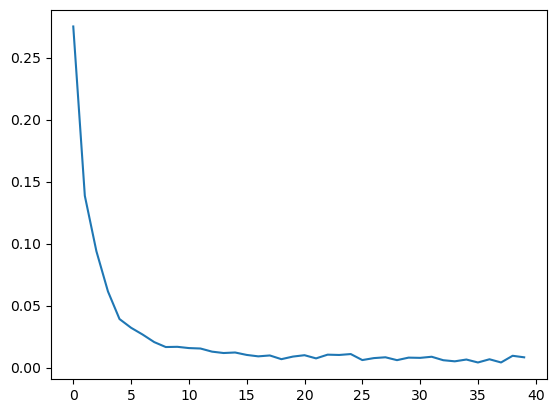

In [75]:
import pandas as pd

history_df = pd.DataFrame(hist.history)
history_df['loss'].plot();

# cnn + lstm

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 1  # Replace this with the actual number of classes in your dataset

# Define the custom embedding layer using the embedding_matrix
embedding_layer = layers.Embedding(
    max_words,
    100,
    weights=[embedding_matrix],  # Pass the embedding_matrix as the weights
    input_length=max_len,
    trainable=False  # Set trainable to False to keep the pre-trained embeddings fixed
)

model_3 = keras.Sequential([
    embedding_layer,
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size=2, strides=2, padding='valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.LSTM(units = 64),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
    
])

In [19]:
model_3.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],

)

In [20]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

model_3.summary()

history = model_3.fit(training_padded, y_train, validation_data=(testing_padded, y_test), 
                      batch_size=20, epochs=20, verbose=2,callbacks = [early_stopping], )


accr = model_3.evaluate(testing_padded, y_test, verbose=0)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 batch_normalization (BatchN  (None, 1000, 100)        400       
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 998, 32)           9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 499, 32)           0         
                                                                 
 batch_normalization_1 (Batc  (None, 499, 32)         

<Axes: title={'center': 'Accuracy'}>

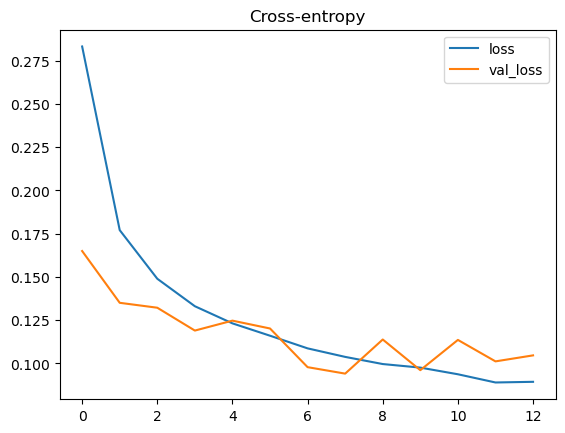

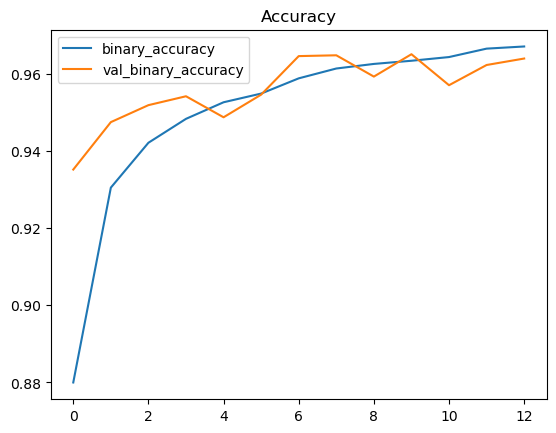

In [24]:
from matplotlib.pyplot import plot
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# fake_bert

In [ ]:
from tensorflow.keras.layers import Input, Embedding

main_input = Input(shape=(1000,), name='main_input')
embedding=Embedding(max_words, 100, input_length=max_len, weights=[embedding_matrix], trainable=False)(main_input)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model


from tensorflow.keras import layers, models

# Input shape: Replace input_shape with the appropriate shape for your data
input_shape = (1000, input_dim)  # Assuming input_dim is the dimension of your input embedding vector

# Create three parallel blocks of 1D-CNN layers
input_layer = layers.Input(shape=input_shape)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 1  # Replace this with the actual number of classes in your dataset

# Define the custom embedding layer using the embedding_matrix
embedding_layer = layers.Embedding(
    max_words,
    100,
    weights=[embedding_matrix],  # Pass the embedding_matrix as the weights
    input_length=max_len,
    trainable=False  # Set trainable to False to keep the pre-trained embeddings fixed
)


# First 1D-CNN block
cnn1 = layers.Conv1D(128, kernel_size=3, activation='relu')(embedding_layer)
maxpool1 = layers.MaxPooling1D(pool_size=2)(cnn1)

# Second 1D-CNN block
cnn2 = layers.Conv1D(128, kernel_size=4, activation='relu')(embedding_layer)
maxpool2 = layers.MaxPooling1D(pool_size=2)(cnn2)

# Third 1D-CNN block
cnn3 = layers.Conv1D(128, kernel_size=5, activation='relu')(embedding_layer)
maxpool3 = layers.MaxPooling1D(pool_size=2)(cnn3)

# Concatenate the outputs of the three 1D-CNN blocks
concatenated_layers = layers.concatenate([maxpool1, maxpool2, maxpool3])

# Max-pooling layer to further reduce vector dimension
maxpool_combined = layers.MaxPooling1D(pool_size=5)(concatenated_layers)

# Convolution layer after concatenation
conv_combined = layers.Conv1D(128, kernel_size=5, activation='relu')(maxpool_combined)

# Two hidden layers
hidden1 = layers.Dense(384, activation='relu')(conv_combined)
hidden2 = layers.Dense(128, activation='relu')(hidden1)

# Output layer
output_layer = layers.Dense(num_classes, activation='sigmoid')(hidden2)



In [ ]:
# Create the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


# using PCA (Principal component analysis)

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your input data (replace it with your actual data)
# Apply standardization to scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(embedding_matrix)


# After creating the embedding_matrix, apply PCA to reduce the dimensionality
pca = PCA(n_components=0.95)  # Set the number of components you want to keep (e.g., 50)
embedding_matrix_pca = pca.fit_transform(scaled_data)

#get the actual number of components after pca
num_components = pca.n_components_
print(num_components)




82


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 1  # Replace this with the actual number of classes in your dataset

# Replace the original embedding_matrix with the PCA-transformed embedding_matrix
embedding_layer = layers.Embedding(
    input_dim = max_words,
    output_dim = num_components,  # Update the number of dimensions to the number of components chosen in PCA
    weights=[embedding_matrix_pca],  # Pass the PCA-transformed embedding_matrix
    input_length=max_len,
    trainable=False
)

model_5 = keras.Sequential([
    embedding_layer,
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size=2, strides=2, padding='valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'valid'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.LSTM(units = 64),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
    
])

In [21]:
model_5.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],

)

model_5.summary()

history = model_5.fit(training_padded, y_train, validation_data=(testing_padded, y_test), 
                      batch_size=20, epochs=20, verbose=2 )


accr = model_5.evaluate(testing_padded, y_test, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 82)          820000    
                                                                 
 batch_normalization (BatchN  (None, 1000, 82)         328       
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 998, 32)           7904      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 499, 32)           0         
                                                                 
 batch_normalization_1 (Batc  (None, 499, 32)         

<Axes: title={'center': 'Accuracy'}>

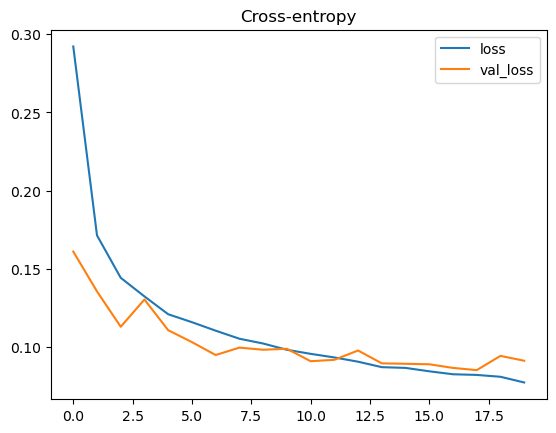

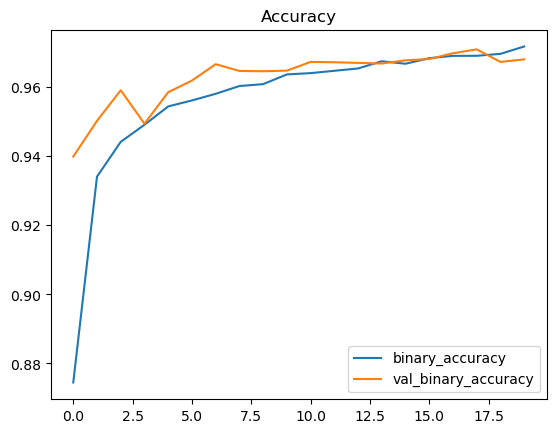

In [22]:
from matplotlib.pyplot import plot
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")